## Importing important libraries for ARIMA Analysis

In [27]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
print("Initial Process complete")

Initial Process complete


In [29]:
trf = pd.read_csv("C:\\Users\\DELL\\Downloads\\The Global Dataset 14 Apr 2020.csv", index_col='yearOfRegistration', parse_dates=['yearOfRegistration'])


In [30]:
trf = trf.iloc[1:]
trf = trf.fillna(method='ffill')
trf.head()

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
yearOfRegistration,,,,,,,,,,,,,,,,,,,,,
2002-01-01,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2002-01-01,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2002-01-01,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2002-01-01,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2002-01-01,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


In [34]:
trf["majorityStatusAtExploit"].asfreq('Y').plot()

ValueError: cannot reindex from a duplicate axis

# 3. Time series decomposition and Random walks
## 3.1. Trends, seasonality and noise

    - Trend - Consistent upwards or downwards slope of our time series
    - Seasonality - Clear periodic pattern of a time series(like sine funtion)
    - Noise - Outliers or missing values

## Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. [We use it to measure our ARIMA model]

ARIMA Model Results
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.014
Date:                Thu, 02 Aug 2018   AIC                         112778.933
Time:                        14:44:02   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.000      -0.487      -0.423
                                

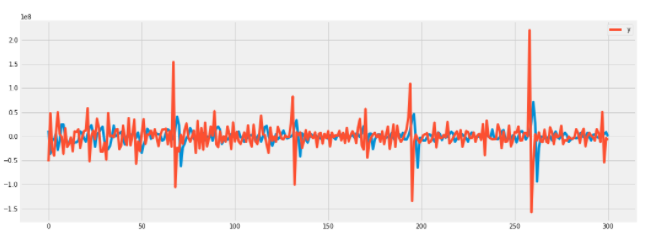

In [48]:
# Predicting the male victims volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(trf.loc[trf.Victim_Count.isin["males"]].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [49]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937593.98493614
